In [2]:
pip install geopandas

     |████████████████████████████████| 921kB 2.8MB/s 
     |████████████████████████████████| 11.8MB 15.0MB/s 
     |████████████████████████████████| 10.1MB 54.4MB/s 


In [0]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


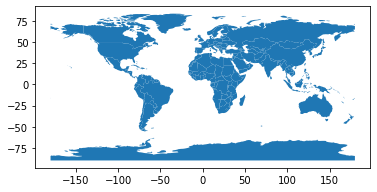

In [10]:
# Plot countries
world.plot()

In [11]:
# Check which column is the active geometry column
world.geometry.name

'geometry'

In [13]:
# Rename the column to Borders & Set that to Geometry
world = world.rename(columns={'geometry': 'borders'}).set_geometry('borders')
world.geometry.name

'borders'

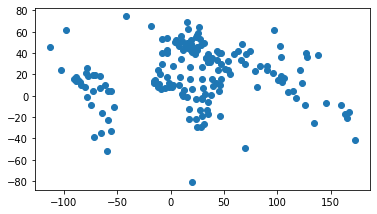

In [15]:
# Create centroids and make it to the geometry using centroid attribute
world['centroid_column'] = world.centroid
world = world.set_geometry('centroid_column')
world.plot()

In [16]:
world['centroid_column'].head()

0    POINT (163.85316 -17.31631)
1      POINT (34.75299 -6.25773)
2     POINT (-12.13783 24.29117)
3     POINT (-98.14238 61.46908)
4    POINT (-112.59944 45.70563)
Name: centroid_column, dtype: geometry

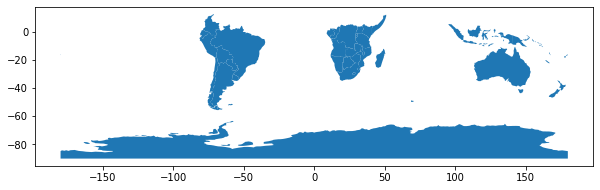

In [28]:
# Slice souther hemisphere using coordinate-based indexing
world = world.set_geometry('borders')
southern_hemisphere = world.cx[:, :0]
southern_hemisphere.plot(figsize=(10,10))

In [19]:
world.geometry.name

'centroid_column'

In [24]:
# Read in Cities data
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


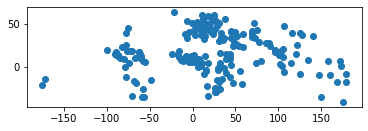

In [25]:
cities.plot()

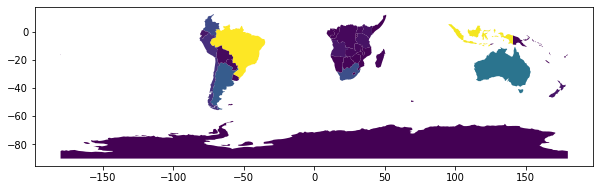

In [31]:
# Create a chloropleth map by setting color with column=
southern_hemisphere.plot(figsize=(10,10), column='gdp_md_est')

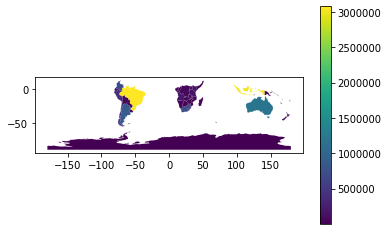

In [35]:
# Create a legend
fig, ax = plt.subplots(1,1)
southern_hemisphere.plot(column='gdp_md_est', ax=ax, legend=True)

In [0]:
# Tutorial: http://geopandas.org/mapping.html